In [28]:
import pandas as pd

drug_df = pd.read_csv("./Data/drug200.csv")
drug_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [29]:
drug_df["Drug"]

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

Data split for data training

In [30]:
from sklearn.model_selection import train_test_split

X = drug_df.drop("Drug", axis=1).values
y = drug_df.Drug.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=125
)

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

cat_col = [1,2,3]
num_col = [0,4]

transform = ColumnTransformer(
    [
        ("encoder", OrdinalEncoder(), cat_col),
        ("num_imputer", SimpleImputer(strategy="median"), num_col),
        ("num_scaler", StandardScaler(), num_col),
    ]
)
pipe = Pipeline(
    steps=[
        ("preprocessing", transform),
        ("model", RandomForestClassifier(n_estimators=100, random_state=125)),
    ]
)
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  [1, 2, 3]),
                                                 ('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  [0, 4]),
                                                 ('num_scaler',
                                                  StandardScaler(), [0, 4])])),
                ('model', RandomForestClassifier(random_state=125))])

In [32]:
from sklearn.metrics import accuracy_score, f1_score

predictions = pipe.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average="macro")

print("Accuracy:", str(round(accuracy, 2) * 100) + "%", "F1:", round(f1, 2))

Accuracy: 95.0% F1: 0.91


In [33]:
with open("Results/metrics.txt", "w") as outfile:
    outfile.write(f"Accuracy = {round(accuracy, 2)}, F1 Score = {round(f1, 2)}"

)

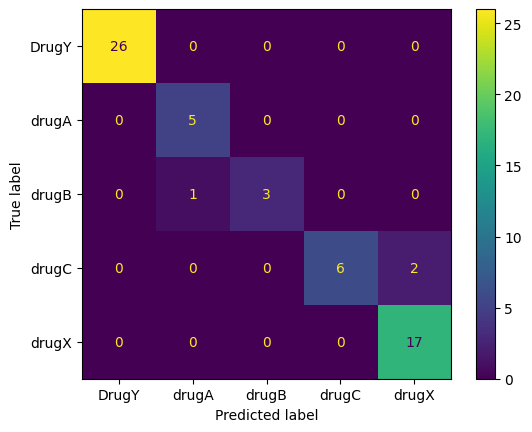

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, predictions, labels=pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot()
plt.savefig("Results/model_results.png", dpi=120)

Saving the model


In [35]:
import pickle

# Save metrics to a text file
with open("Results/metrics.txt", "w") as outfile:
    outfile.write(f"Accuracy = {round(accuracy, 2)}, F1 Score = {round(f1, 2)}")

# Save the model pipeline to a file using pickle
with open("Model/drug_pipeline.pkl", "wb") as model_file:
    pickle.dump(pipe, model_file)


In [36]:
# Load the model pipeline from the pickle file
with open("Model/drug_pipeline.pkl", "rb") as model_file:
    loaded_pipeline = pickle.load(model_file)

In [63]:
dataset_path="./Data/drug202.csv"


In [64]:
  # Extract dataset name (without extension) and current timestamp
dataset_name = os.path.splitext(os.path.basename(dataset_path))[0]
timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M")

In [65]:
dataset_name

'drug202'

In [66]:
timestamp

'20241012-2005'

In [67]:
import os
import datetime

In [68]:
results_dir = os.path.join("Results", f"{dataset_name}_{timestamp}")
os.makedirs(results_dir, exist_ok=True)    


In [69]:
results_dir


'Results/drug202_20241012-2005'

In [70]:
metrics_path = os.path.join(results_dir, "metrics.txt")
with open(metrics_path, "w") as outfile:outfile.write(f"Accuracy = {round(accuracy * 100, 2)}%, F1 Score = {round(f1, 2)}\n")

In [71]:
import os
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import datetime

In [74]:
    # Save the model pipeline to a file using pickle
model_path = os.path.join("Model", f"{dataset_name}_pipeline_{timestamp}.pkl")
os.makedirs("Model", exist_ok=True)  # Ensure Model directory exists
with open(model_path, "wb") as model_file:pickle.dump(pipe, model_file)

In [7]:
import os
dataset_files = os.listdir("/home/arshad/CI-CD-for-ML/Data")
dataset_files


['drug200.csv', 'drug202.csv', 'drug201.csv']

In [8]:
import os
print(os.getcwd())


/home/arshad/CI-CD-for-ML
